In [119]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd

In [120]:
#reading csv file

headers_name = ['First_Term_Gpa','Second_Term_Gpa', 'First_Language', 'Funding', 'School', 'FastTrack', 'Coop','Residency','Gender','Previous_Education','Age_Group','High_School_Average_Mark','Math_Score','English_Grade','First_Year_Persistence']
df = pd.read_csv('Student data.csv', names=headers_name) 
df.head(50)



,First_Term_Gpa,Second_Term_Gpa,First_Language,Funding,School,FastTrack,Coop,Residency,Gender,Previous_Education,Age_Group,High_School_Average_Mark,Math_Score,English_Grade,First_Year_Persistence
0,Student Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Independent variables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,First Term Gpa' numeric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Second Term Gpa' numeric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,First Language' numeric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Funding numeric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,School numeric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,FastTrack numeric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Coop numeric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Residency numeric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
#dropping the first 23 rows
df.drop(df.index[:24], inplace=True)
df.head(10)


,First_Term_Gpa,Second_Term_Gpa,First_Language,Funding,School,FastTrack,Coop,Residency,Gender,Previous_Education,Age_Group,High_School_Average_Mark,Math_Score,English_Grade,First_Year_Persistence
24,0,0,1,2.0,6.0,2.0,1.0,1.0,2.0,1,1,59,16,7,1.0
25,2.5,2,3,4.0,6.0,1.0,2.0,2.0,2.0,1,3,?,?,7,1.0
26,4.25,3.923077,1,1.0,6.0,2.0,1.0,1.0,1.0,2,3,92,41,9,1.0
27,3.020833,2.321429,3,4.0,6.0,1.0,2.0,2.0,2.0,2,3,?,?,8,1.0
28,4.275,4.326923,1,2.0,6.0,1.0,1.0,1.0,1.0,2,3,97,?,9,1.0
29,4.357143,4.326087,1,2.0,6.0,2.0,1.0,1.0,2.0,2,3,101,45,9,1.0
30,2.210526,1.375,1,2.0,6.0,2.0,1.0,1.0,2.0,1,1,68,20,7,0.0
31,2.045455,2.961538,1,2.0,6.0,2.0,1.0,1.0,2.0,1,1,79,34,9,1.0
32,4.285714,3.608696,1,2.0,6.0,2.0,1.0,1.0,1.0,1,2,98,39,9,1.0
33,2.863636,1.3,1,2.0,6.0,2.0,1.0,1.0,2.0,1,1,78,29,7,1.0


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1437 entries, 24 to 1460
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   First_Term_Gpa            1437 non-null   object 
 1   Second_Term_Gpa           1437 non-null   object 
 2   First_Language            1437 non-null   object 
 3   Funding                   1437 non-null   float64
 4   School                    1437 non-null   float64
 5   FastTrack                 1437 non-null   float64
 6   Coop                      1437 non-null   float64
 7   Residency                 1437 non-null   float64
 8   Gender                    1437 non-null   float64
 9   Previous_Education        1437 non-null   object 
 10  Age_Group                 1437 non-null   object 
 11  High_School_Average_Mark  1437 non-null   object 
 12  Math_Score                1437 non-null   object 
 13  English_Grade             1437 non-null   object 
 14  First_Y

In [123]:
#printing unique values of each column
#print("Unique values of First_Term_Gpa:",df['First_Term_Gpa'].unique())
#print("Unique values of Second_Term_Gpa:",df['Second_Term_Gpa'].unique())
print("# of values of '?' in First_Term_Gpa:",df['First_Term_Gpa'].where(df['First_Term_Gpa'] == '?').count())
print("# of values of '?' in Second_Term_Gpa:",df['Second_Term_Gpa'].where(df['Second_Term_Gpa'] == '?').count())
print("Unique values of First_Language:",df['First_Language'].unique())
print("Unique values of Funding:",df['Funding'].unique())
print("Unique values of School:",df['School'].unique())
print("Unique values of FastTrack:",df['FastTrack'].unique())
print("Unique values of Coop:",df['Coop'].unique())
print("Unique values of Residency:",df['Residency'].unique())
print("Unique values of Gender:",df['Gender'].unique())
print("Unique values of Previous_Education:",df['Previous_Education'].unique())
print("Unique values of Age_Group:",df['Age_Group'].unique())
print("Unique values of High_School_Average_Mark:",df['High_School_Average_Mark'].unique())
print("Unique values of Math_Score:",df['Math_Score'].unique())
print("Unique values of English_Grade:",df['English_Grade'].unique())
print("Unique values of First_Year_Persistence:", df['First_Year_Persistence'].unique())


# of values of '?' in First_Term_Gpa: 17
# of values of '?' in Second_Term_Gpa: 160
Unique values of First_Language: ['1' '3' '?' '2']
Unique values of Funding: [2. 4. 1. 8. 5. 9.]
Unique values of School: [6.]
Unique values of FastTrack: [2. 1.]
Unique values of Coop: [1. 2.]
Unique values of Residency: [1. 2.]
Unique values of Gender: [2. 1. 3.]
Unique values of Previous_Education: ['1' '2' '0' '?']
Unique values of Age_Group: ['1' '3' '2' '4' '8' '6' '5' '7' '?']
Unique values of High_School_Average_Mark: ['59' '?' '92' '97' '101' '68' '79' '98' '78' '73' '81' '95' '80' '85'
 '83' '60' '76' '87' '82' '74' '88' '90' '17' '75' '50' '48' '63' '69'
 '72' '86' '77' '67' '84' '65' '93' '52' '102' '96' '53' '89' '61' '45'
 '54' '66' '94' '55' '71' '104' '64' '91' '56' '105' '70' '57' '42' '62'
 '100' '107' '58' '25' '99' '51' '103' '44' '108']
Unique values of Math_Score: ['16' '?' '41' '45' '20' '34' '39' '29' '18' '17' '38' '47' '48' '28' '32'
 '43' '26' '31' '21' '46' '40' '25' '23' '22

In [124]:
import numpy as np
#replacing the '?' with NaN
df_cleaned = df.replace('?', np.nan)
print("# of values of '?' in First_Term_Gpa",df_cleaned['First_Term_Gpa'].where(df_cleaned['First_Term_Gpa'] == '?').count())
print("# of values of '?' in Second_Term_Gpa",df_cleaned['Second_Term_Gpa'].where(df_cleaned['Second_Term_Gpa'] == '?').count())
print("Unique values of First_Language:",df_cleaned['First_Language'].unique())
print("Unique values of Funding:",df_cleaned['Funding'].unique())
print("Unique values of School:",df_cleaned['School'].unique())
print("Unique values of FastTrack:",df_cleaned['FastTrack'].unique())
print("Unique values of Coop:",df_cleaned['Coop'].unique())
print("Unique values of Residency:",df_cleaned['Residency'].unique())
print("Unique values of Gender:",df_cleaned['Gender'].unique())
print("Unique values of Previous_Education:",df_cleaned['Previous_Education'].unique())
print("Unique values of Age_Group:",df_cleaned['Age_Group'].unique())
print("Unique values of High_School_Average_Mark:",df_cleaned['High_School_Average_Mark'].unique())
print("Unique values of Math_Score:",df_cleaned['Math_Score'].unique())
print("Unique values of English_Grade:",df_cleaned['English_Grade'].unique())

# of values of '?' in First_Term_Gpa 0
# of values of '?' in Second_Term_Gpa 0
Unique values of First_Language: ['1' '3' nan '2']
Unique values of Funding: [2. 4. 1. 8. 5. 9.]
Unique values of School: [6.]
Unique values of FastTrack: [2. 1.]
Unique values of Coop: [1. 2.]
Unique values of Residency: [1. 2.]
Unique values of Gender: [2. 1. 3.]
Unique values of Previous_Education: ['1' '2' '0' nan]
Unique values of Age_Group: ['1' '3' '2' '4' '8' '6' '5' '7' nan]
Unique values of High_School_Average_Mark: ['59' nan '92' '97' '101' '68' '79' '98' '78' '73' '81' '95' '80' '85'
 '83' '60' '76' '87' '82' '74' '88' '90' '17' '75' '50' '48' '63' '69'
 '72' '86' '77' '67' '84' '65' '93' '52' '102' '96' '53' '89' '61' '45'
 '54' '66' '94' '55' '71' '104' '64' '91' '56' '105' '70' '57' '42' '62'
 '100' '107' '58' '25' '99' '51' '103' '44' '108']
Unique values of Math_Score: ['16' nan '41' '45' '20' '34' '39' '29' '18' '17' '38' '47' '48' '28' '32'
 '43' '26' '31' '21' '46' '40' '25' '23' '22' '19

In [125]:
# encoding some features 
df_cleaned['Coop'] = df_cleaned['Coop'].map({1: 0, 2: 1})
df_cleaned['FastTrack'] = df_cleaned['FastTrack'].map({1: 0, 2: 1})
df_cleaned['Residency'] = df_cleaned['Residency'].map({1: 0, 2: 1})


In [126]:
numerical_columns = ['First_Term_Gpa','Second_Term_Gpa','High_School_Average_Mark','Math_Score']

#converting the numerical columns to double
df_cleaned[numerical_columns] = df_cleaned[numerical_columns].astype(float)
print(df_cleaned.info())
df_cleaned.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1437 entries, 24 to 1460
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   First_Term_Gpa            1420 non-null   float64
 1   Second_Term_Gpa           1277 non-null   float64
 2   First_Language            1326 non-null   object 
 3   Funding                   1437 non-null   float64
 4   School                    1437 non-null   float64
 5   FastTrack                 1437 non-null   int64  
 6   Coop                      1437 non-null   int64  
 7   Residency                 1437 non-null   int64  
 8   Gender                    1437 non-null   float64
 9   Previous_Education        1433 non-null   object 
 10  Age_Group                 1433 non-null   object 
 11  High_School_Average_Mark  694 non-null    float64
 12  Math_Score                975 non-null    float64
 13  English_Grade             1392 non-null   object 
 14  First_Y

,First_Term_Gpa,Second_Term_Gpa,First_Language,Funding,School,FastTrack,Coop,Residency,Gender,Previous_Education,Age_Group,High_School_Average_Mark,Math_Score,English_Grade,First_Year_Persistence
24,0.00,0.000000,1,2.0,6.0,1,0,0,2.0,1,1,59.0,16.0,7,1.0
25,2.50,2.000000,3,4.0,6.0,0,1,1,2.0,1,3,NaN,NaN,7,1.0
26,4.25,3.923077,1,1.0,6.0,1,0,0,1.0,2,3,92.0,41.0,9,1.0


In [127]:
#reviewing and treating the missing values
print(df_cleaned.isnull().sum())
df_cleaned.describe()


First_Term_Gpa               17
Second_Term_Gpa             160
First_Language              111
Funding                       0
School                        0
FastTrack                     0
Coop                          0
Residency                     0
Gender                        0
Previous_Education            4
Age_Group                     4
High_School_Average_Mark    743
Math_Score                  462
English_Grade                45
First_Year_Persistence        0
dtype: int64


,First_Term_Gpa,Second_Term_Gpa,Funding,School,FastTrack,Coop,Residency,Gender,High_School_Average_Mark,Math_Score,First_Year_Persistence
count,1420.000000,1277.000000,1437.000000,1437.0,1437.000000,1437.000000,1437.000000,1437.000000,694.000000,975.000000,1437.000000
mean,2.846073,2.820176,2.926931,6.0,0.741823,0.695198,0.406402,1.774530,77.152738,32.557949,0.791928
std,1.175098,1.128632,1.257658,0.0,0.437784,0.460484,0.491332,0.419699,12.072760,10.709458,0.406070
min,0.000000,0.000000,1.000000,6.0,0.000000,0.000000,0.000000,1.000000,17.000000,6.000000,0.000000
25%,2.250000,2.260000,2.000000,6.0,0.000000,0.000000,0.000000,2.000000,70.000000,23.000000,1.000000
50%,3.102632,3.027778,2.000000,6.0,1.000000,1.000000,0.000000,2.000000,77.500000,32.000000,1.000000
75%,3.739130,3.680000,4.000000,6.0,1.000000,1.000000,1.000000,2.000000,85.000000,43.000000,1.000000
max,4.500000,4.500000,9.000000,6.0,1.000000,1.000000,1.000000,3.000000,108.000000,50.000000,1.000000


In [128]:
# show rows ( 17)
df_cleaned[pd.isnull(df_cleaned['First_Term_Gpa'])]

,First_Term_Gpa,Second_Term_Gpa,First_Language,Funding,School,FastTrack,Coop,Residency,Gender,Previous_Education,Age_Group,High_School_Average_Mark,Math_Score,English_Grade,First_Year_Persistence
107,NaN,NaN,3,4.0,6.0,1,1,1,1.0,1,1,NaN,19.0,7,0.0
238,NaN,NaN,1,2.0,6.0,1,1,0,2.0,1,1,66.0,17.0,7,0.0
249,NaN,NaN,1,2.0,6.0,1,0,0,2.0,1,2,64.0,21.0,9,0.0
261,NaN,NaN,3,2.0,6.0,1,1,0,2.0,1,2,74.0,33.0,4,0.0
295,NaN,NaN,2,2.0,6.0,1,0,0,1.0,1,1,80.0,23.0,8,0.0
419,NaN,NaN,1,2.0,6.0,1,1,0,1.0,1,3,93.0,30.0,9,0.0
446,NaN,NaN,1,2.0,6.0,1,0,0,2.0,1,4,NaN,20.0,7,0.0
538,NaN,NaN,1,2.0,6.0,1,0,0,2.0,2,2,60.0,32.0,9,0.0
708,NaN,NaN,1,2.0,6.0,1,1,0,2.0,1,1,80.0,31.0,7,0.0
868,NaN,NaN,1,2.0,6.0,1,1,0,2.0,1,3,65.0,17.0,9,0.0


In [129]:
# delete nan rows 
df_cleaned = df_cleaned.dropna(subset=['First_Term_Gpa'])

In [130]:
# fill missing value with mean 
df_cleaned['Second_Term_Gpa'] = df_cleaned['Second_Term_Gpa'].fillna(df_cleaned['Second_Term_Gpa'].mean())
df_cleaned.isnull().sum()


First_Term_Gpa                0
Second_Term_Gpa               0
First_Language              111
Funding                       0
School                        0
FastTrack                     0
Coop                          0
Residency                     0
Gender                        0
Previous_Education            4
Age_Group                     4
High_School_Average_Mark    740
Math_Score                  461
English_Grade                44
First_Year_Persistence        0
dtype: int64

In [131]:
#dropping the column 'High_School_Average_Mark' as it has too many missing values
df_cleaned.drop('High_School_Average_Mark', axis=1, inplace=True)

#dropping the column 'School' as it only has one value
df_cleaned.drop('School', axis=1, inplace=True)

df_cleaned.isnull().sum()

First_Term_Gpa              0
Second_Term_Gpa             0
First_Language            111
Funding                     0
FastTrack                   0
Coop                        0
Residency                   0
Gender                      0
Previous_Education          4
Age_Group                   4
Math_Score                461
English_Grade              44
First_Year_Persistence      0
dtype: int64

In [132]:
# dropping the rows with only 4 values missing 
df_cleaned = df_cleaned.dropna(subset=['Previous_Education'])
df_cleaned = df_cleaned.dropna(subset=['Age_Group'])
df_cleaned.isnull().sum()

First_Term_Gpa              0
Second_Term_Gpa             0
First_Language            107
Funding                     0
FastTrack                   0
Coop                        0
Residency                   0
Gender                      0
Previous_Education          0
Age_Group                   0
Math_Score                459
English_Grade              44
First_Year_Persistence      0
dtype: int64

In [133]:
first_language_counts = df_cleaned['First_Language'].value_counts(dropna=False)

print("First Language Value Counts:")
print(first_language_counts)

First Language Value Counts:
1      707
3      599
NaN    107
2        3
Name: First_Language, dtype: int64


In [134]:
# creating a new category for first language feature ( 4)

df_cleaned['First_Language'] = df_cleaned['First_Language'].fillna('4')
df_cleaned.isnull().sum()

First_Term_Gpa              0
Second_Term_Gpa             0
First_Language              0
Funding                     0
FastTrack                   0
Coop                        0
Residency                   0
Gender                      0
Previous_Education          0
Age_Group                   0
Math_Score                459
English_Grade              44
First_Year_Persistence      0
dtype: int64

In [135]:
#creating a new category
#adding the 5th value to the missing values of column 'English_Grade'. Creating a new category '5'
df_cleaned['English_Grade'] = df_cleaned['English_Grade'].fillna('5')
print(df_cleaned['English_Grade'].value_counts())

9     496
8     315
7     245
10    184
4      96
5      44
3      31
1       3
2       2
Name: English_Grade, dtype: int64


In [136]:
#completing the missing values of column 'Math_Score' with the mean value
df_cleaned['Math_Score'] = df_cleaned['Math_Score'].fillna(df_cleaned['Math_Score'].mean())
df_cleaned.isnull().sum()

# all done, no missing value 

First_Term_Gpa            0
Second_Term_Gpa           0
First_Language            0
Funding                   0
FastTrack                 0
Coop                      0
Residency                 0
Gender                    0
Previous_Education        0
Age_Group                 0
Math_Score                0
English_Grade             0
First_Year_Persistence    0
dtype: int64

In [137]:
print("# of values of '?' in First_Term_Gpa",df_cleaned['First_Term_Gpa'].where(df_cleaned['First_Term_Gpa'] == '?').count())
print("# of values of '?' in Second_Term_Gpa",df_cleaned['Second_Term_Gpa'].where(df_cleaned['Second_Term_Gpa'] == '?').count())
print("Unique values of First_Language:",df_cleaned['First_Language'].unique())
print("Unique values of Funding:",df_cleaned['Funding'].unique())
print("Unique values of FastTrack:",df_cleaned['FastTrack'].unique())
print("Unique values of Coop:",df_cleaned['Coop'].unique())
print("Unique values of Residency:",df_cleaned['Residency'].unique())
print("Unique values of Gender:",df_cleaned['Gender'].unique())
print("Unique values of Previous_Education:",df_cleaned['Previous_Education'].unique())
print("Unique values of Age_Group:",df_cleaned['Age_Group'].unique())
print("Unique values of Math_Score:",df_cleaned['Math_Score'].unique())
print("Unique values of English_Grade:",df_cleaned['English_Grade'].unique())

# of values of '?' in First_Term_Gpa 0
# of values of '?' in Second_Term_Gpa 0
Unique values of First_Language: ['1' '3' '4' '2']
Unique values of Funding: [2. 4. 1. 8. 5. 9.]
Unique values of FastTrack: [1 0]
Unique values of Coop: [0 1]
Unique values of Residency: [0 1]
Unique values of Gender: [2. 1. 3.]
Unique values of Previous_Education: ['1' '2' '0']
Unique values of Age_Group: ['1' '3' '2' '4' '8' '6' '5' '7']
Unique values of Math_Score: [16.         32.67607106 41.         45.         20.         34.
 39.         29.         18.         17.         38.         47.
 48.         28.         32.         43.         26.         31.
 21.         46.         40.         25.         23.         22.
 19.         10.         35.         49.         44.         27.
 42.         24.         36.         15.         14.         30.
 37.         12.         33.         50.          9.          6.
 13.         11.        ]
Unique values of English_Grade: ['7' '9' '8' '10' '4' '3' '5' '2' '1

In [138]:
df_cleaned.head(3)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1416 entries, 24 to 1460
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   First_Term_Gpa          1416 non-null   float64
 1   Second_Term_Gpa         1416 non-null   float64
 2   First_Language          1416 non-null   object 
 3   Funding                 1416 non-null   float64
 4   FastTrack               1416 non-null   int64  
 5   Coop                    1416 non-null   int64  
 6   Residency               1416 non-null   int64  
 7   Gender                  1416 non-null   float64
 8   Previous_Education      1416 non-null   object 
 9   Age_Group               1416 non-null   object 
 10  Math_Score              1416 non-null   float64
 11  English_Grade           1416 non-null   object 
 12  First_Year_Persistence  1416 non-null   float64
dtypes: float64(6), int64(3), object(4)
memory usage: 154.9+ KB


In [139]:
#defining the columns that will be handled with one hot encoding
columns_for_onehot_encoding = ['First_Language', 'Funding', 'Gender', 'Previous_Education', 'Age_Group', 'English_Grade']

#creating the dummy variables for the columns defined above
df_dummies = pd.get_dummies(df_cleaned, columns=columns_for_onehot_encoding, dtype=float)
df_dummies.head(3)

,First_Term_Gpa,Second_Term_Gpa,FastTrack,Coop,Residency,Math_Score,First_Year_Persistence,First_Language_1,First_Language_2,First_Language_3,...,Age_Group_8,English_Grade_1,English_Grade_10,English_Grade_2,English_Grade_3,English_Grade_4,English_Grade_5,English_Grade_7,English_Grade_8,English_Grade_9
24,0.00,0.000000,1,0,0,16.000000,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25,2.50,2.000000,0,1,1,32.676071,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
26,4.25,3.923077,1,0,0,41.000000,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [140]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1416 entries, 24 to 1460
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   First_Term_Gpa          1416 non-null   float64
 1   Second_Term_Gpa         1416 non-null   float64
 2   FastTrack               1416 non-null   int64  
 3   Coop                    1416 non-null   int64  
 4   Residency               1416 non-null   int64  
 5   Math_Score              1416 non-null   float64
 6   First_Year_Persistence  1416 non-null   float64
 7   First_Language_1        1416 non-null   float64
 8   First_Language_2        1416 non-null   float64
 9   First_Language_3        1416 non-null   float64
 10  First_Language_4        1416 non-null   float64
 11  Funding_1.0             1416 non-null   float64
 12  Funding_2.0             1416 non-null   float64
 13  Funding_4.0             1416 non-null   float64
 14  Funding_5.0             1416 non-null  

In [146]:
#converting the columns 'FastTrack', 'Coop' and 'Residency' to float because they can influence the model by the weight of the numbers
df_dummies['FastTrack'] = df_dummies['FastTrack'].astype(float)
df_dummies['Coop'] = df_dummies['Coop'].astype(float)
df_dummies['Residency'] = df_dummies['Residency'].astype(float)
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1416 entries, 24 to 1460
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   First_Term_Gpa          1416 non-null   float64
 1   Second_Term_Gpa         1416 non-null   float64
 2   FastTrack               1416 non-null   float64
 3   Coop                    1416 non-null   float64
 4   Residency               1416 non-null   float64
 5   Math_Score              1416 non-null   float64
 6   First_Year_Persistence  1416 non-null   float64
 7   First_Language_1        1416 non-null   float64
 8   First_Language_2        1416 non-null   float64
 9   First_Language_3        1416 non-null   float64
 10  First_Language_4        1416 non-null   float64
 11  Funding_1.0             1416 non-null   float64
 12  Funding_2.0             1416 non-null   float64
 13  Funding_4.0             1416 non-null   float64
 14  Funding_5.0             1416 non-null  

In [147]:
df_dummies.head(5)

,First_Term_Gpa,Second_Term_Gpa,FastTrack,Coop,Residency,Math_Score,First_Year_Persistence,First_Language_1,First_Language_2,First_Language_3,...,Age_Group_8,English_Grade_1,English_Grade_10,English_Grade_2,English_Grade_3,English_Grade_4,English_Grade_5,English_Grade_7,English_Grade_8,English_Grade_9
24,0.000000,0.000000,1.0,0.0,0.0,16.000000,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25,2.500000,2.000000,0.0,1.0,1.0,32.676071,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
26,4.250000,3.923077,1.0,0.0,0.0,41.000000,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
27,3.020833,2.321429,0.0,1.0,1.0,32.676071,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
28,4.275000,4.326923,0.0,0.0,0.0,32.676071,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [149]:
#defining the target and data
X = df_dummies.drop('First_Year_Persistence',axis=1)
y = df_dummies['First_Year_Persistence']

#Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify = y)

In [152]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [153]:
# Defining the model 

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [154]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [155]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/50
29/29 [==============================] - 1s 12ms/step - loss: 0.5329 - accuracy: 0.7757 - val_loss: 0.4212 - val_accuracy: 0.8238
Epoch 2/50
29/29 [==============================] - 0s 6ms/step - loss: 0.4155 - accuracy: 0.8199 - val_loss: 0.4071 - val_accuracy: 0.8282
Epoch 3/50
29/29 [==============================] - 0s 5ms/step - loss: 0.3635 - accuracy: 0.8641 - val_loss: 0.4058 - val_accuracy: 0.8326
Epoch 4/50
29/29 [==============================] - 0s 5ms/step - loss: 0.3275 - accuracy: 0.8718 - val_loss: 0.4099 - val_accuracy: 0.8370
Epoch 5/50
29/29 [==============================] - 0s 4ms/step - loss: 0.3077 - accuracy: 0.8785 - val_loss: 0.4127 - val_accuracy: 0.8370
Epoch 6/50
29/29 [==============================] - 0s 5ms/step - loss: 0.2952 - accuracy: 0.8873 - val_loss: 0.4228 - val_accuracy: 0.8414
Epoch 7/50
29/29 [==============================] - 0s 5ms/step - loss: 0.2870 - accuracy: 0.8884 - val_loss: 0.4191 - val_accuracy: 0.8414
Epoch 8/50
29/29 [=

In [156]:
# Evaluate the model on the test set
_, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)


9/9 [==============================] - 0s 3ms/step - loss: 0.6748 - accuracy: 0.8380
Test Accuracy: 0.8380281925201416


Text(0, 0.5, 'Accuracy')

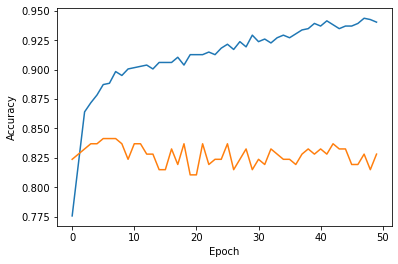

In [157]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [158]:
import joblib

# Assuming your model is named 'model'
joblib.dump(model, 'saved_model.joblib')

['saved_model.joblib']

In [160]:
# Saving  X_test and y_test data
df_cleaned.to_csv('df_student_cleaned.csv', index=False)
